# Setup & Imports

This cell sets up the Python environment for loading and displaying saved results.

- Adds the parent directory to Python path
- Imports libraries for data loading (csv) and visualization (matplotlib)
- Configures matplotlib for inline display
- Sets up path to results directory


In [ ]:
import sys
import os

# Add parent directory to Python path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
from IPython.display import display, HTML

# Configure matplotlib for inline display in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

# Path to results directory
results_dir = os.path.join('..', 'results')

print("=" * 60)
print("FINAL REPORT DASHBOARD")
print("=" * 60)
print(f"Results directory: {results_dir}")
print("=" * 60)


FINAL REPORT DASHBOARD
Results directory: ../results


# Load Rastrigin Results

Load and display summary statistics from Rastrigin experiments.

- Reads `rastrigin_summary.csv` and displays formatted table
- Loads convergence data from `rastrigin_convergence.csv`
- Shows summary statistics including average fitness, standard deviation, and execution time


In [ ]:
# Load Rastrigin Results
print("=" * 60)
print("RASTRIGIN FUNCTION RESULTS")
print("=" * 60)

# Load summary data
summary_file = os.path.join(results_dir, 'rastrigin_summary.csv')
if os.path.exists(summary_file):
    print(f"\n📊 Summary Statistics:")
    print("-" * 60)
    
    with open(summary_file, 'r') as f:
        reader = csv.DictReader(f)
        rows = list(reader)
        
        # Display as formatted table
        print(f"{'Algorithm':<10} {'Dim':<6} {'Avg Fitness':<15} {'Std Dev':<12} {'Avg Time (s)':<15}")
        print("-" * 60)
        for row in rows:
            print(f"{row['Algorithm']:<10} {row['Dimension']:<6} {float(row['Avg_Fitness']):<15.4f} "
                  f"{float(row['Std_Dev_Fitness']):<12.4f} {float(row['Avg_Time']):<15.4f}")
    
    # Store for later use
    rastrigin_summary = rows
    print(f"\n✓ Loaded {len(rows)} summary records")
else:
    print(f"⚠ Warning: {summary_file} not found!")
    print("Please run 01_Experiment_Rastrigin.ipynb first.")
    rastrigin_summary = []

# Load convergence data
convergence_file = os.path.join(results_dir, 'rastrigin_convergence.csv')
if os.path.exists(convergence_file):
    convergence_data_rastrigin = {}
    with open(convergence_file, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            iteration = int(row['Iteration'])
            for key, value in row.items():
                if key != 'Iteration':
                    if key not in convergence_data_rastrigin:
                        convergence_data_rastrigin[key] = []
                    convergence_data_rastrigin[key].append(float(value))
    print(f"✓ Loaded convergence data with {len(convergence_data_rastrigin)} series")
else:
    print(f"⚠ Warning: {convergence_file} not found!")
    convergence_data_rastrigin = {}


RASTRIGIN FUNCTION RESULTS

📊 Summary Statistics:
------------------------------------------------------------
Algorithm  Dim    Avg Fitness     Std Dev      Avg Time (s)   
------------------------------------------------------------
PSO        10     34.7730         9.8125       0.1072         
ABC        10     15.5598         3.4623       0.4989         
FA         10     74.1911         7.7668       2.8494         
CS         10     75.2762         11.7284      0.1346         
GA         10     8.6712          3.2750       0.4004         
HC         10     106.2694        17.0923      0.0015         
PSO        30     201.8299        26.0612      0.1065         
ABC        30     169.5454        17.6926      0.4508         
FA         30     369.1725        13.3892      2.9637         
CS         30     346.7652        26.7837      0.1447         
GA         30     77.3114         9.0887       0.8553         
HC         30     450.8317        43.8782      0.0014         

✓ Loaded

# Display Rastrigin Visualizations

Load and display all saved visualization plots for Rastrigin experiments.

- Displays convergence plots from `results/convergence/`
- Displays robustness (box plot) visualizations from `results/robustness/`
- Displays complexity analysis plots from `results/complexity/`
- Shows plots for both dimensions (D=10 and D=30)


RASTRIGIN VISUALIZATIONS

📈 CONVERGENCE Analysis:
------------------------------------------------------------


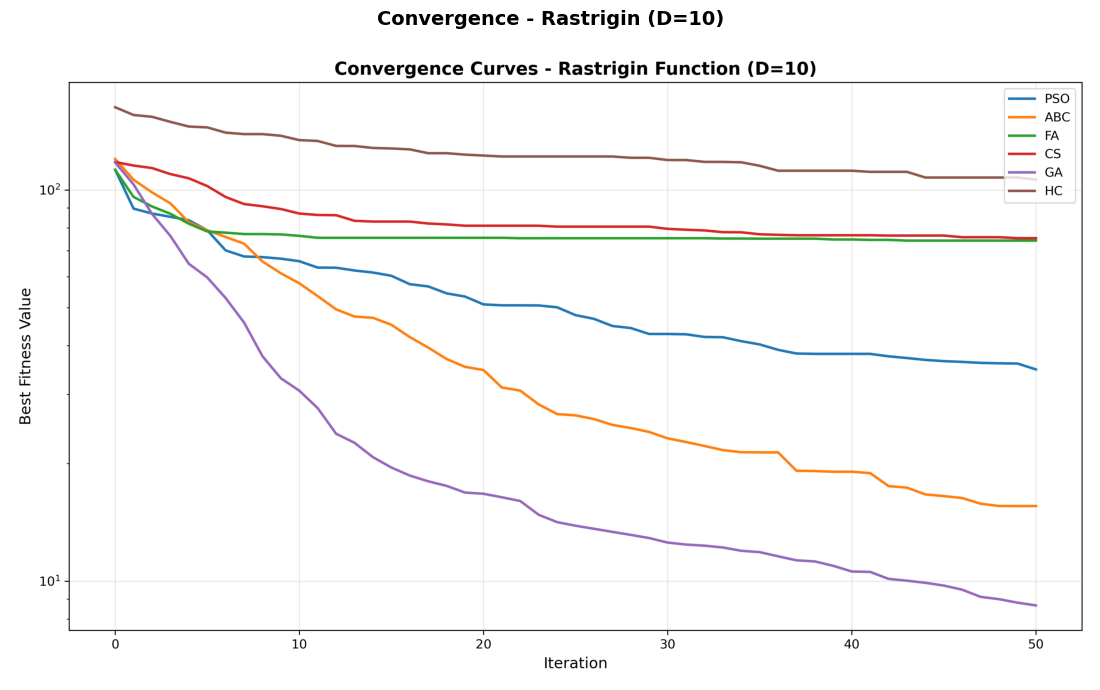

✓ Displayed: ../results/convergence/convergence_rastrigin_D10.png


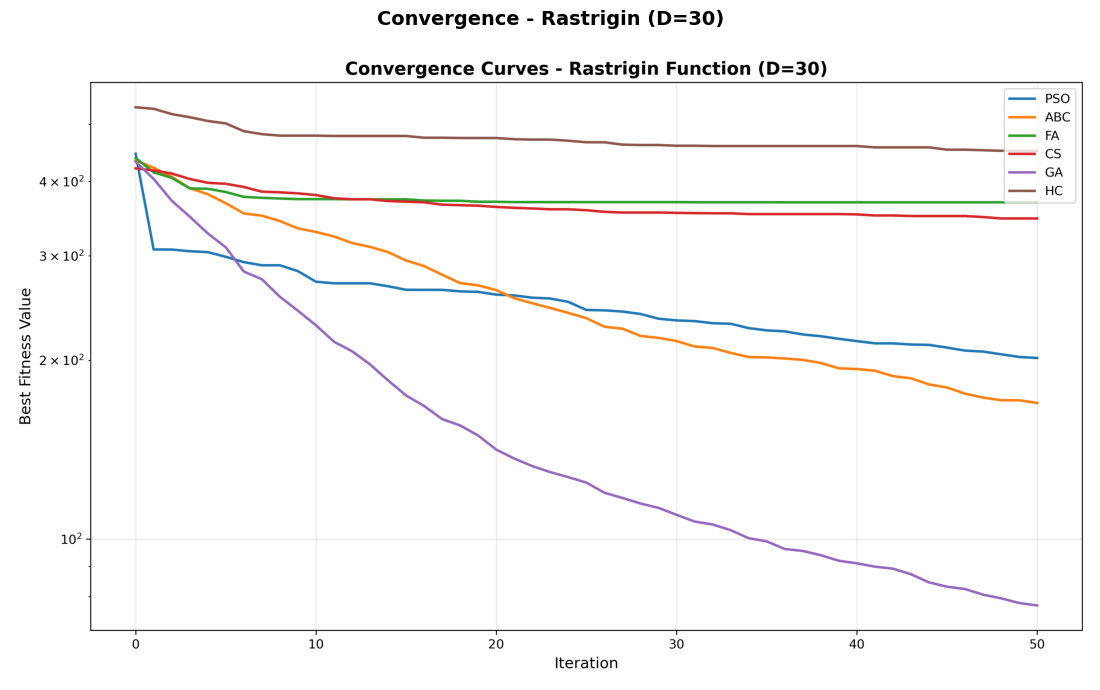

✓ Displayed: ../results/convergence/convergence_rastrigin_D30.png

📈 ROBUSTNESS Analysis:
------------------------------------------------------------


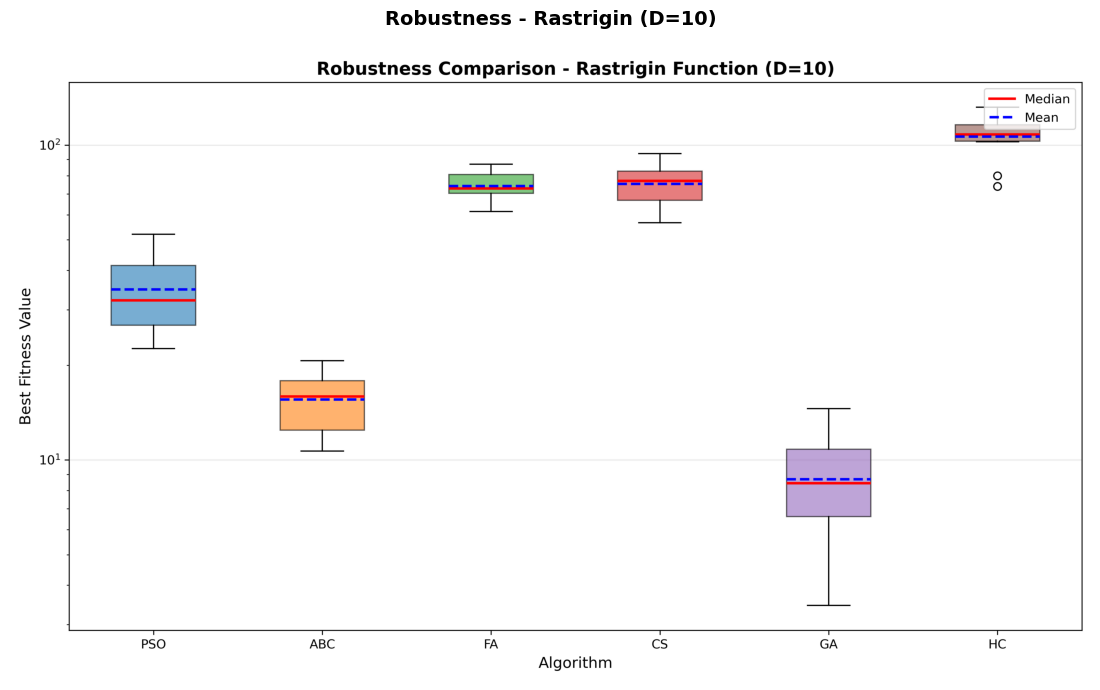

✓ Displayed: ../results/robustness/robustness_rastrigin_D10.png


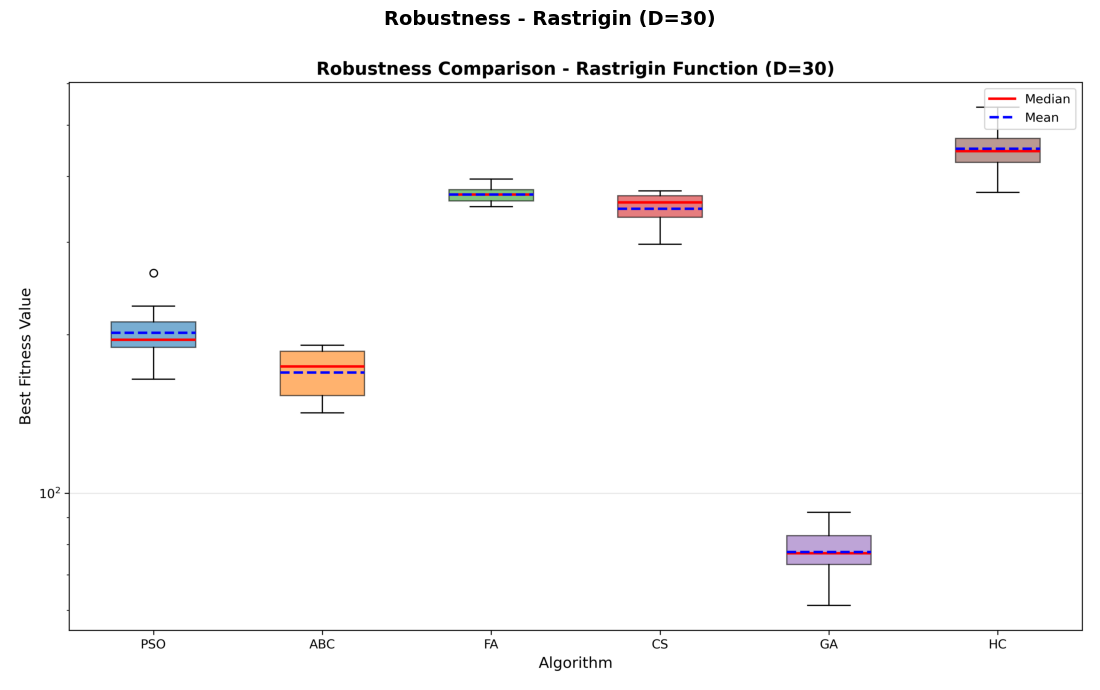

✓ Displayed: ../results/robustness/robustness_rastrigin_D30.png

📈 COMPLEXITY Analysis:
------------------------------------------------------------


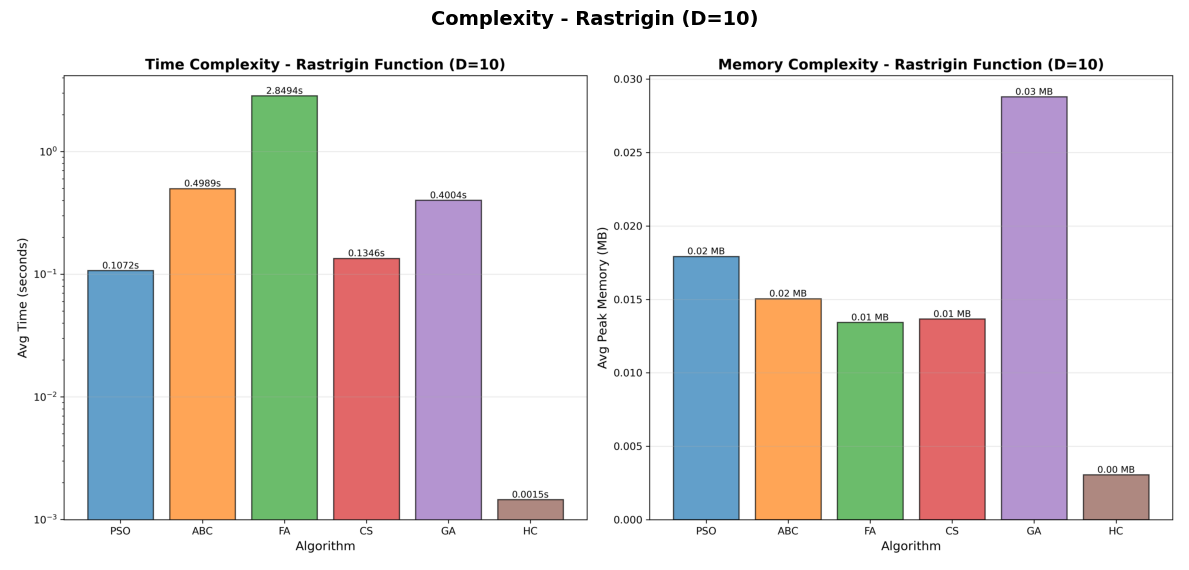

✓ Displayed: ../results/complexity/complexity_rastrigin_D10.png


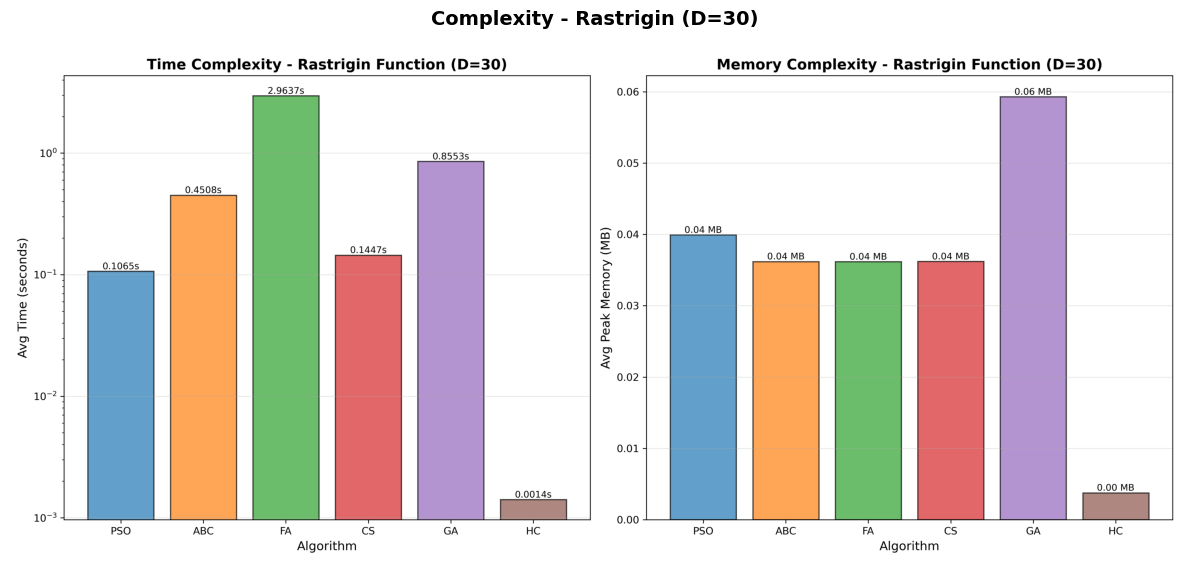

✓ Displayed: ../results/complexity/complexity_rastrigin_D30.png



In [ ]:
# Display Rastrigin Visualizations
print("=" * 60)
print("RASTRIGIN VISUALIZATIONS")
print("=" * 60)

# Color scheme
colors = {
    'PSO': '#1f77b4',
    'ABC': '#ff7f0e',
    'FA': '#2ca02c',
    'CS': '#d62728',
    'GA': '#9467bd',
    'HC': '#8c564b'
}

dimensions = [10, 30]
algorithms = ['PSO', 'ABC', 'FA', 'CS', 'GA', 'HC']

# Try to load saved plots first, otherwise recreate from data
for plot_type in ['convergence', 'robustness', 'complexity']:
    print(f"\n📈 {plot_type.upper()} Analysis:")
    print("-" * 60)
    
    for D in dimensions:
        plot_path = os.path.join(results_dir, plot_type, f'{plot_type}_rastrigin_D{D}.png')
        
        if os.path.exists(plot_path):
            # Display saved image
            img = plt.imread(plot_path)
            fig, ax = plt.subplots(figsize=(12, 7))
            ax.imshow(img)
            ax.axis('off')
            plt.title(f'{plot_type.capitalize()} - Rastrigin (D={D})', fontsize=14, fontweight='bold', pad=20)
            plt.tight_layout()
            plt.show()
            print(f"✓ Displayed: {plot_path}")
        else:
            print(f"⚠ {plot_path} not found")
            
print("\n" + "=" * 60)


# Load Knapsack Results

Load and display summary statistics from Knapsack experiments.

- Reads `knapsack_summary.csv` and displays formatted table
- Loads convergence data from `knapsack_convergence.csv`
- Shows summary statistics including average fitness, standard deviation, and execution time


In [ ]:
# Load Knapsack Results
print("=" * 60)
print("KNAPSACK PROBLEM RESULTS")
print("=" * 60)

# Load summary data
summary_file = os.path.join(results_dir, 'knapsack_summary.csv')
if os.path.exists(summary_file):
    print(f"\n📊 Summary Statistics:")
    print("-" * 60)
    
    with open(summary_file, 'r') as f:
        reader = csv.DictReader(f)
        rows = list(reader)
        
        # Display as formatted table
        print(f"{'Algorithm':<10} {'N_Items':<10} {'Avg Fitness':<15} {'Std Dev':<12} {'Avg Time (s)':<15}")
        print("-" * 60)
        for row in rows:
            print(f"{row['Algorithm']:<10} {row['N_Items']:<10} {float(row['Avg_Fitness']):<15.2f} "
                  f"{float(row['Std_Dev_Fitness']):<12.2f} {float(row['Avg_Time']):<15.4f}")
    
    # Store for later use
    knapsack_summary = rows
    print(f"\n✓ Loaded {len(rows)} summary records")
else:
    print(f"⚠ Warning: {summary_file} not found!")
    print("Please run 02_Experiment_Knapsack.ipynb first.")
    knapsack_summary = []

# Load convergence data
convergence_file = os.path.join(results_dir, 'knapsack_convergence.csv')
if os.path.exists(convergence_file):
    convergence_data_knapsack = {}
    with open(convergence_file, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            iteration = int(row['Iteration'])
            for key, value in row.items():
                if key != 'Iteration':
                    if key not in convergence_data_knapsack:
                        convergence_data_knapsack[key] = []
                    convergence_data_knapsack[key].append(float(value))
    print(f"✓ Loaded convergence data with {len(convergence_data_knapsack)} series")
else:
    print(f"⚠ Warning: {convergence_file} not found!")
    convergence_data_knapsack = {}


KNAPSACK PROBLEM RESULTS

📊 Summary Statistics:
------------------------------------------------------------
Algorithm  N_Items    Avg Fitness     Std Dev      Avg Time (s)   
------------------------------------------------------------
PSO        20         -652.60         41.96        0.1152         
ABC        20         -633.70         14.50        0.4844         
FA         20         -600.20         20.96        1.5308         
CS         20         -630.50         32.00        0.1629         
GA         20         -735.00         4.58         0.1527         
HC         20         -569.80         61.16        0.0007         
ACO        20         -738.00         0.00         1.8198         
SA         20         -572.40         71.20        0.0010         
PSO        50         -1635.50        74.59        0.1181         
ABC        50         -1491.10        30.05        0.4834         
FA         50         -1375.40        69.26        0.9974         
CS         50         -143

# Display Knapsack Visualizations

Load and display all saved visualization plots for Knapsack experiments.

- Displays convergence plots from `results/convergence/`
- Displays robustness (box plot) visualizations from `results/robustness/`
- Displays complexity analysis plots from `results/complexity/`
- Shows plots for both problem sizes (N=20 and N=50 items)


KNAPSACK VISUALIZATIONS

📈 CONVERGENCE Analysis:
------------------------------------------------------------


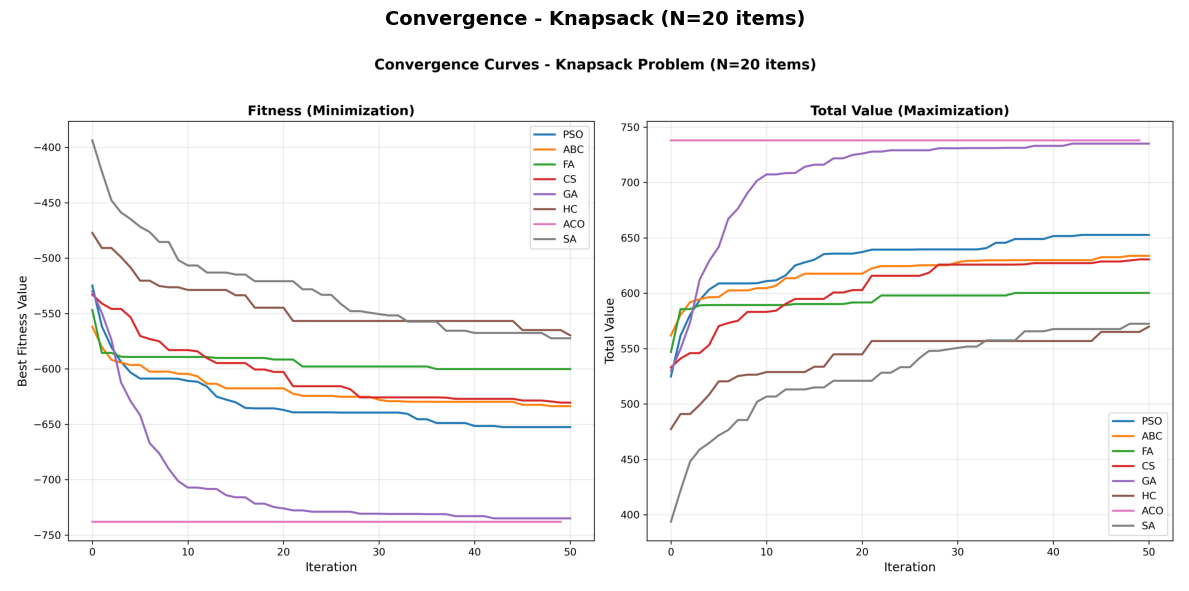

✓ Displayed: ../results/convergence/convergence_knapsack_N20.png


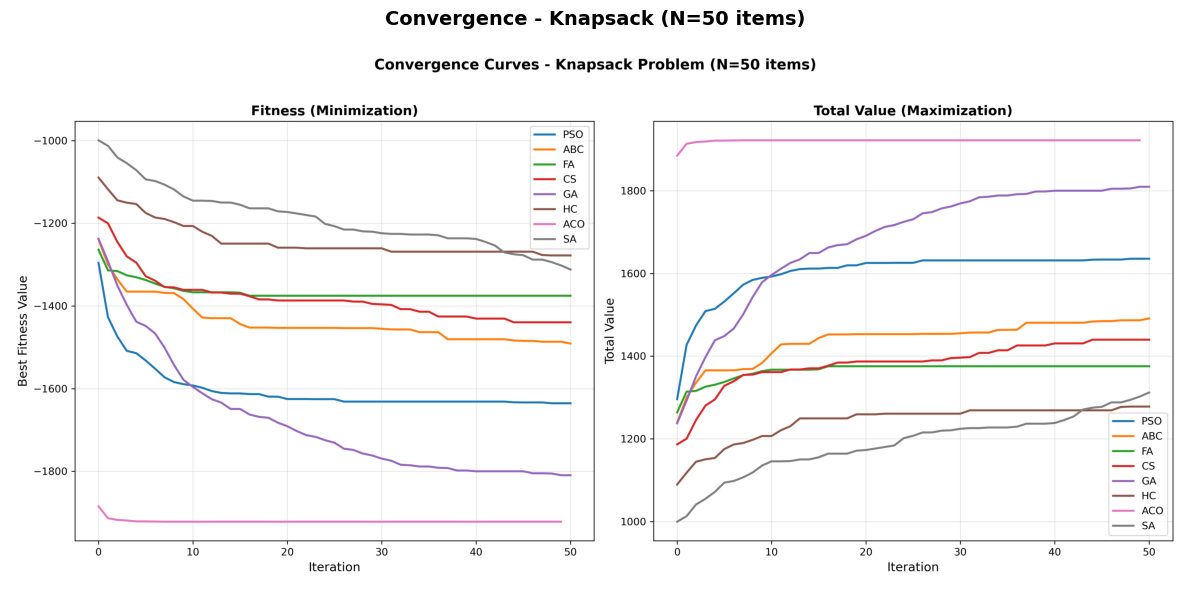

✓ Displayed: ../results/convergence/convergence_knapsack_N50.png

📈 ROBUSTNESS Analysis:
------------------------------------------------------------


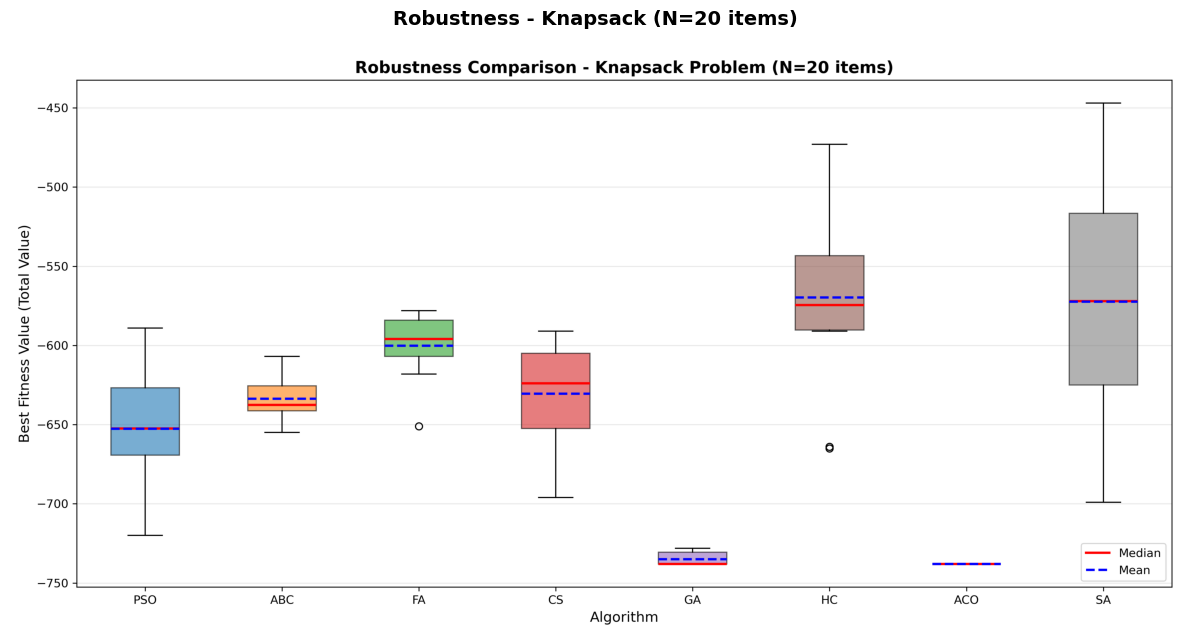

✓ Displayed: ../results/robustness/robustness_knapsack_N20.png


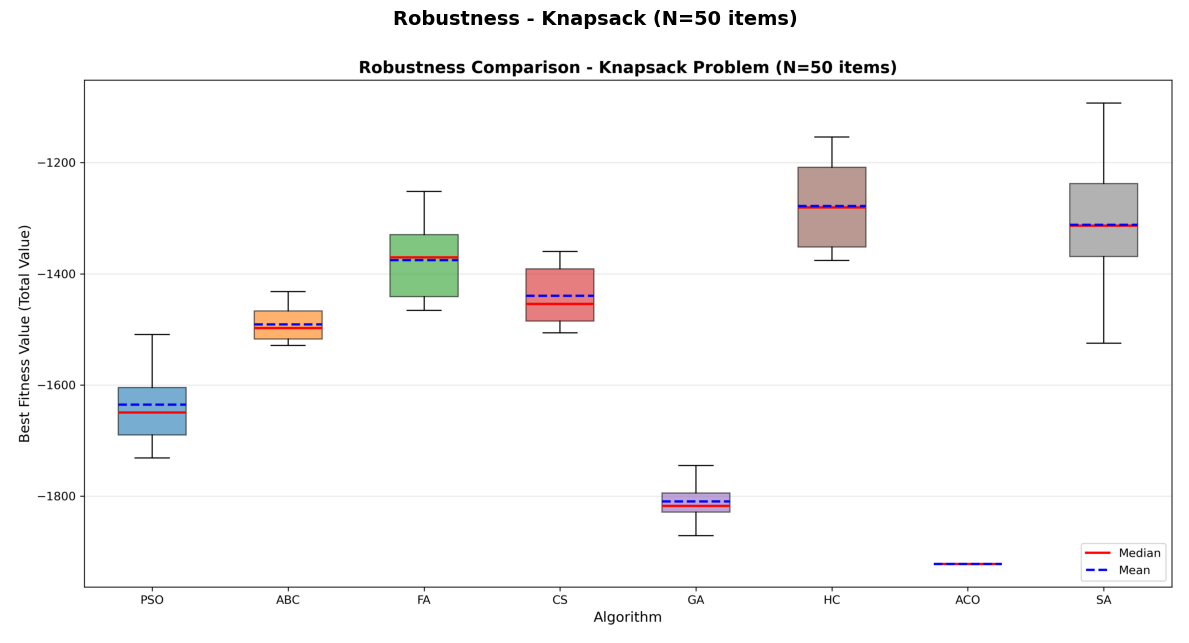

✓ Displayed: ../results/robustness/robustness_knapsack_N50.png

📈 COMPLEXITY Analysis:
------------------------------------------------------------


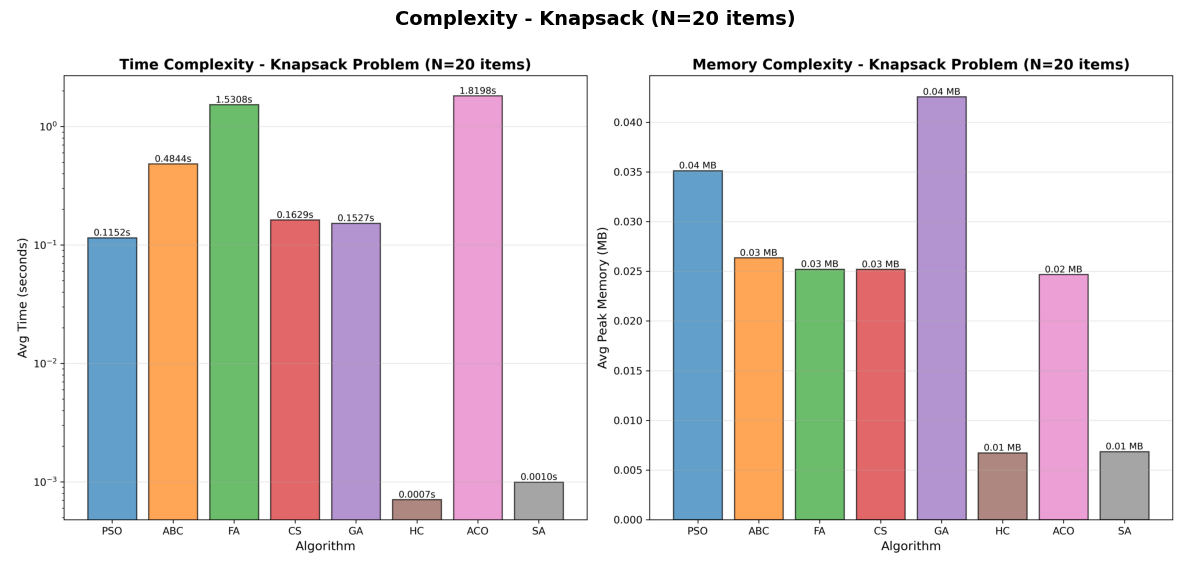

✓ Displayed: ../results/complexity/complexity_knapsack_N20.png


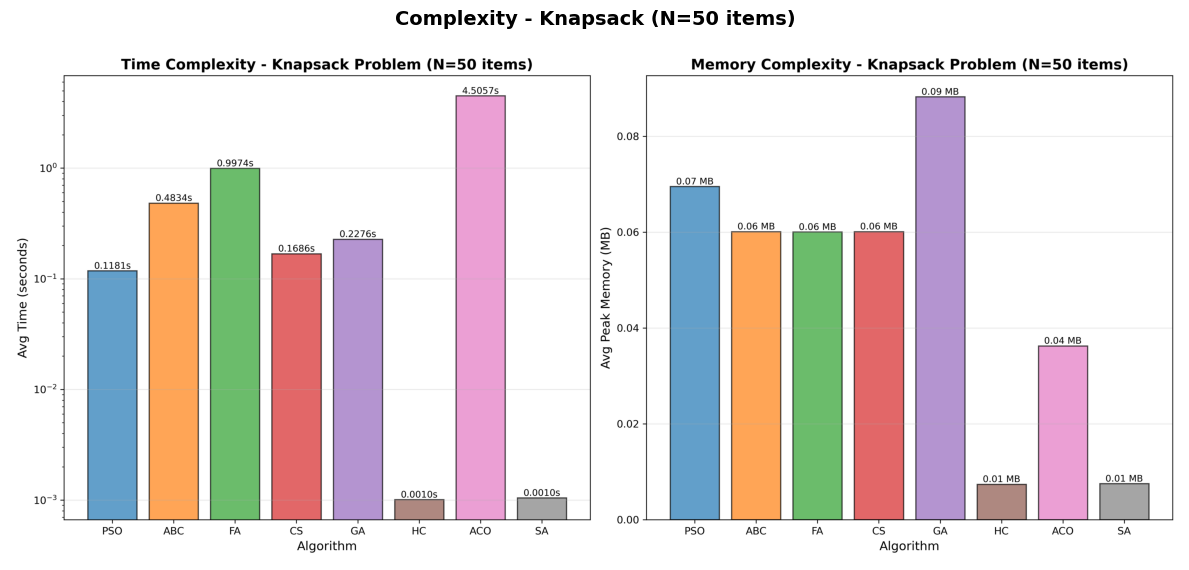

✓ Displayed: ../results/complexity/complexity_knapsack_N50.png



In [ ]:
# Display Knapsack Visualizations
print("=" * 60)
print("KNAPSACK VISUALIZATIONS")
print("=" * 60)

n_items_list = [20, 50]

# Try to load saved plots first, otherwise recreate from data
for plot_type in ['convergence', 'robustness', 'complexity']:
    print(f"\n📈 {plot_type.upper()} Analysis:")
    print("-" * 60)
    
    for n in n_items_list:
        plot_path = os.path.join(results_dir, plot_type, f'{plot_type}_knapsack_N{n}.png')
        
        if os.path.exists(plot_path):
            # Display saved image
            img = plt.imread(plot_path)
            fig, ax = plt.subplots(figsize=(12, 7))
            ax.imshow(img)
            ax.axis('off')
            plt.title(f'{plot_type.capitalize()} - Knapsack (N={n} items)', fontsize=14, fontweight='bold', pad=20)
            plt.tight_layout()
            plt.show()
            print(f"✓ Displayed: {plot_path}")
        else:
            print(f"⚠ {plot_path} not found")
            
print("\n" + "=" * 60)


# Summary Statistics & Comparison

Generate overall summary comparing all algorithms across both problems.

- Identifies best performing algorithms by dimension/problem size
- Identifies fastest algorithms
- Provides quick overview of experimental results


In [ ]:
# Summary Statistics & Comparison
print("=" * 60)
print("OVERALL SUMMARY & COMPARISON")
print("=" * 60)

# Rastrigin best performers
if rastrigin_summary:
    print("\n🏆 RASTRIGIN - Best Algorithms by Dimension:")
    print("-" * 60)
    
    for D in [10, 30]:
        dim_results = [r for r in rastrigin_summary if int(r['Dimension']) == D]
        if dim_results:
            # Sort by average fitness (lower is better)
            dim_results_sorted = sorted(dim_results, key=lambda x: float(x['Avg_Fitness']))
            print(f"\nD={D}:")
            print(f"  🥇 Best: {dim_results_sorted[0]['Algorithm']} "
                  f"(Fitness: {float(dim_results_sorted[0]['Avg_Fitness']):.4f})")
            print(f"  ⏱️  Fastest: {min(dim_results, key=lambda x: float(x['Avg_Time']))['Algorithm']} "
                  f"(Time: {min([float(r['Avg_Time']) for r in dim_results]):.4f}s)")

# Knapsack best performers
if knapsack_summary:
    print("\n🏆 KNAPSACK - Best Algorithms by Problem Size:")
    print("-" * 60)
    
    for n in [20, 50]:
        n_results = [r for r in knapsack_summary if int(r['N_Items']) == n]
        if n_results:
            # Sort by average fitness (lower is better for minimization, but knapsack uses negative fitness)
            n_results_sorted = sorted(n_results, key=lambda x: float(x['Avg_Fitness']))
            print(f"\nN={n} items:")
            print(f"  🥇 Best: {n_results_sorted[0]['Algorithm']} "
                  f"(Fitness: {float(n_results_sorted[0]['Avg_Fitness']):.2f})")
            print(f"  ⏱️  Fastest: {min(n_results, key=lambda x: float(x['Avg_Time']))['Algorithm']} "
                  f"(Time: {min([float(r['Avg_Time']) for r in n_results]):.4f}s)")

print("\n" + "=" * 60)
print("📝 Note: This dashboard loads results from CSV and PNG files.")
print("   Make sure to run 01_Experiment_Rastrigin.ipynb and")
print("   02_Experiment_Knapsack.ipynb first to generate the data.")
print("=" * 60)


OVERALL SUMMARY & COMPARISON

🏆 RASTRIGIN - Best Algorithms by Dimension:
------------------------------------------------------------

D=10:
  🥇 Best: GA (Fitness: 8.6712)
  ⏱️  Fastest: HC (Time: 0.0015s)

D=30:
  🥇 Best: GA (Fitness: 77.3114)
  ⏱️  Fastest: HC (Time: 0.0014s)

🏆 KNAPSACK - Best Algorithms by Problem Size:
------------------------------------------------------------

N=20 items:
  🥇 Best: ACO (Fitness: -738.00)
  ⏱️  Fastest: HC (Time: 0.0007s)

N=50 items:
  🥇 Best: ACO (Fitness: -1922.00)
  ⏱️  Fastest: HC (Time: 0.0010s)

📝 Note: This dashboard loads results from CSV and PNG files.
   Make sure to run 01_Experiment_Rastrigin.ipynb and
   02_Experiment_Knapsack.ipynb first to generate the data.
